In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data

In [2]:
df = pd.read_csv('cluster_mpg.csv')
df = df.dropna()
df_w_dummies = pd.get_dummies(df.drop('name',axis=1))
df_w_dummies.drop(['origin_europe','origin_japan','origin_usa'],axis=1)

mpg  cylinders  displacement  horsepower  weight  acceleration   
0    18.0          8         307.0       130.0    3504          12.0  \
1    15.0          8         350.0       165.0    3693          11.5   
2    18.0          8         318.0       150.0    3436          11.0   
3    16.0          8         304.0       150.0    3433          12.0   
4    17.0          8         302.0       140.0    3449          10.5   
..    ...        ...           ...         ...     ...           ...   
387  27.0          4         140.0        86.0    2790          15.6   
388  44.0          4          97.0        52.0    2130          24.6   
389  32.0          4         135.0        84.0    2295          11.6   
390  28.0          4         120.0        79.0    2625          18.6   
391  31.0          4         119.0        82.0    2720          19.4   

     model_year  
0            70  
1            70  
2            70  
3            70  
4            70  
..          ...  
387          82  
388          82  
389          82  
390          82  
391          82  

[392 rows x 7 columns]

In [3]:
from cluster_assesment import *

In [4]:
agg = agglo(df_w_dummies.drop(['origin_europe','origin_japan','origin_usa'],axis=1))

To use Aglomerative clusterisation data required MinMax preprocessing

In [5]:
agg.minmax()

By using PCA data was preprocesed to build the diagram wich is showing posible ways for clusterisation

pca.explained_variance_ratio_ = [0.71580512 0.12365591]
np.sum(pca.explained_variance_ratio_ = 0.8394610315374585


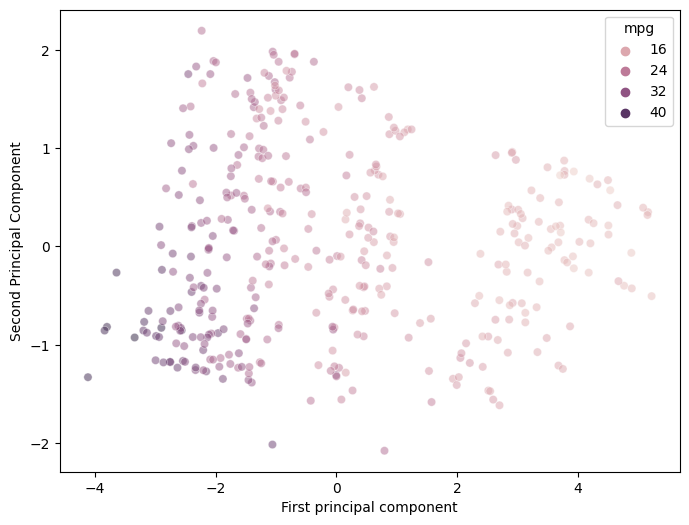

In [6]:
agg.simple_check('origin','model_year')

pca.explained_variance_ratio_ = [0.71580512 0.12365591]
np.sum(pca.explained_variance_ratio_ = 0.8394610315374585


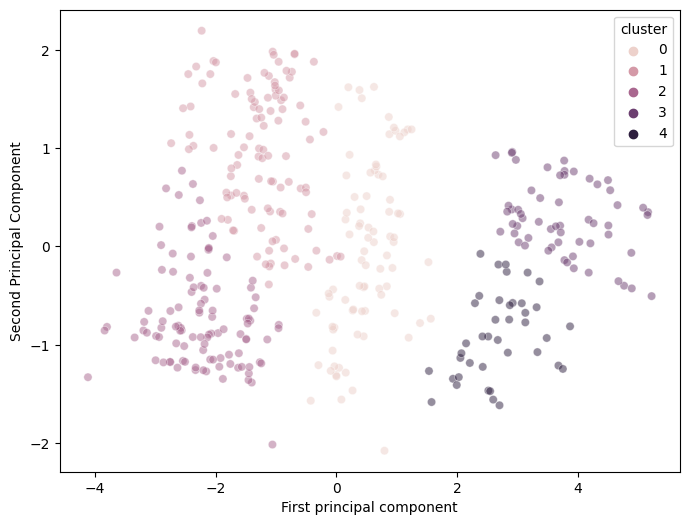

In [7]:
agg.build_simple(5)

By the following diagram it is possible to find optimal number of cluster with saficient Distance_threshold and Silhouette parameters

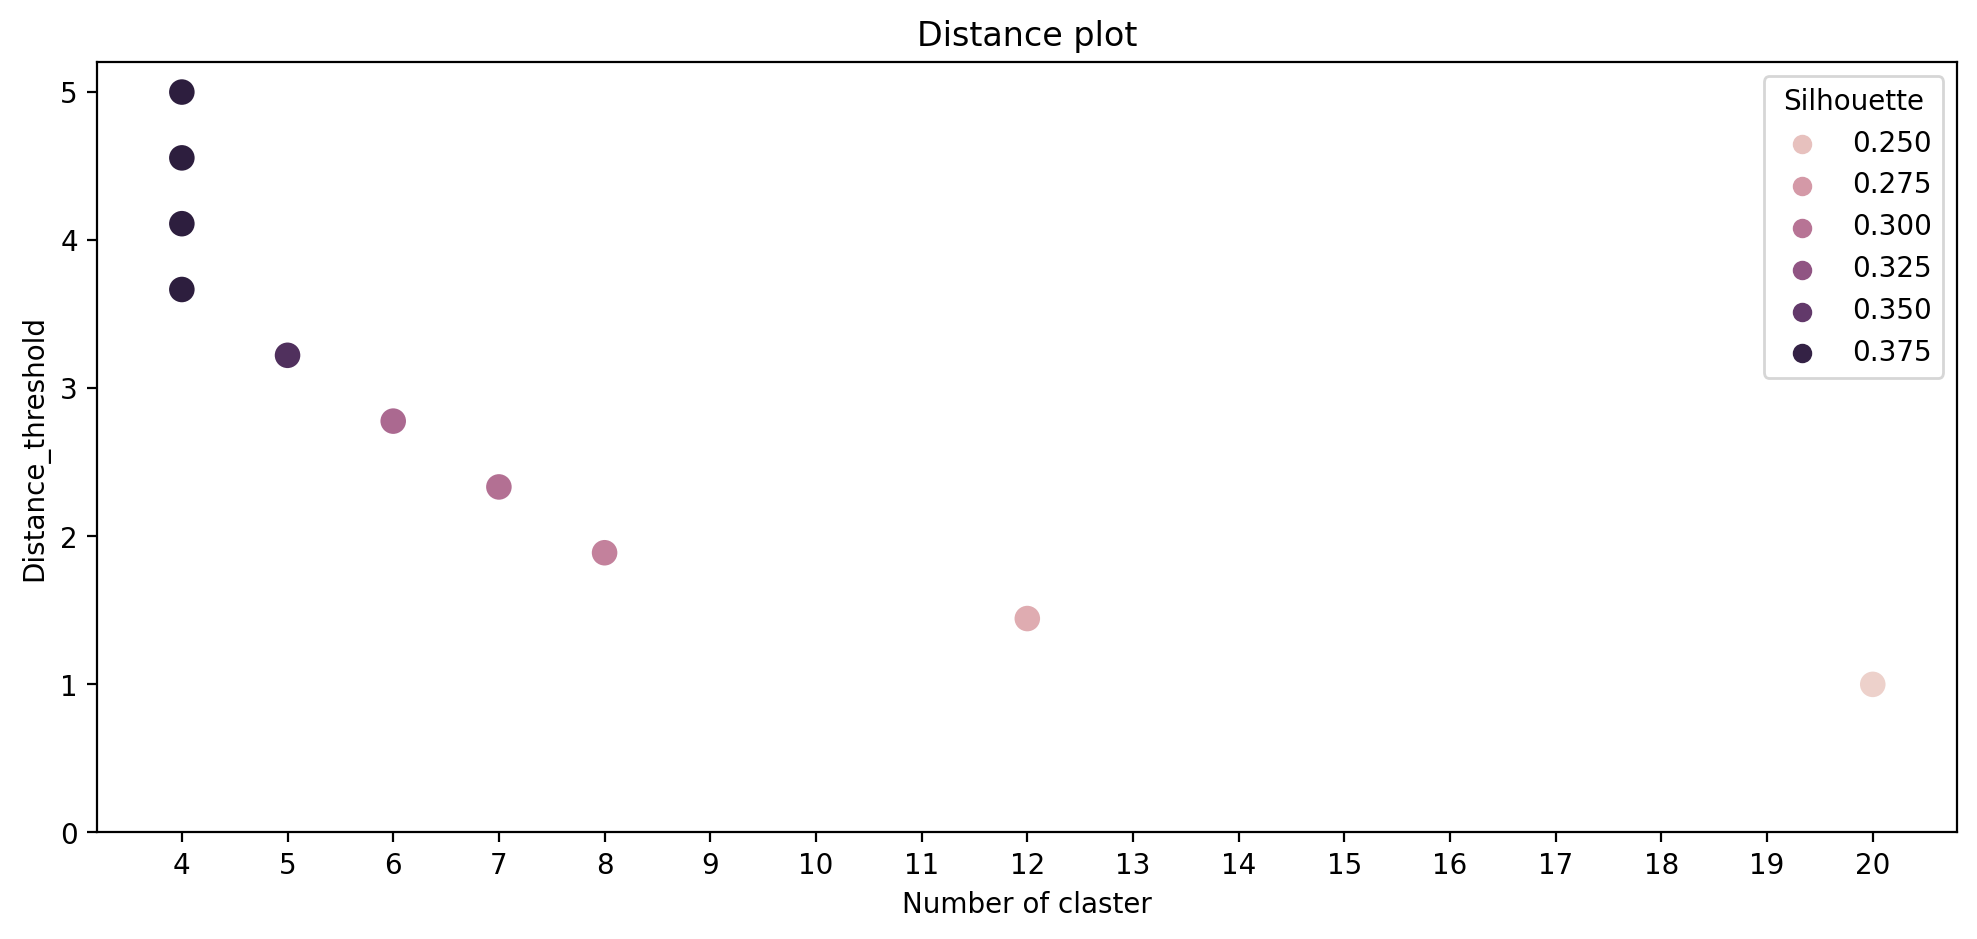

In [8]:
agg.distance()

By using this diagram possible make assesment of choosen amount of cluster on actual data

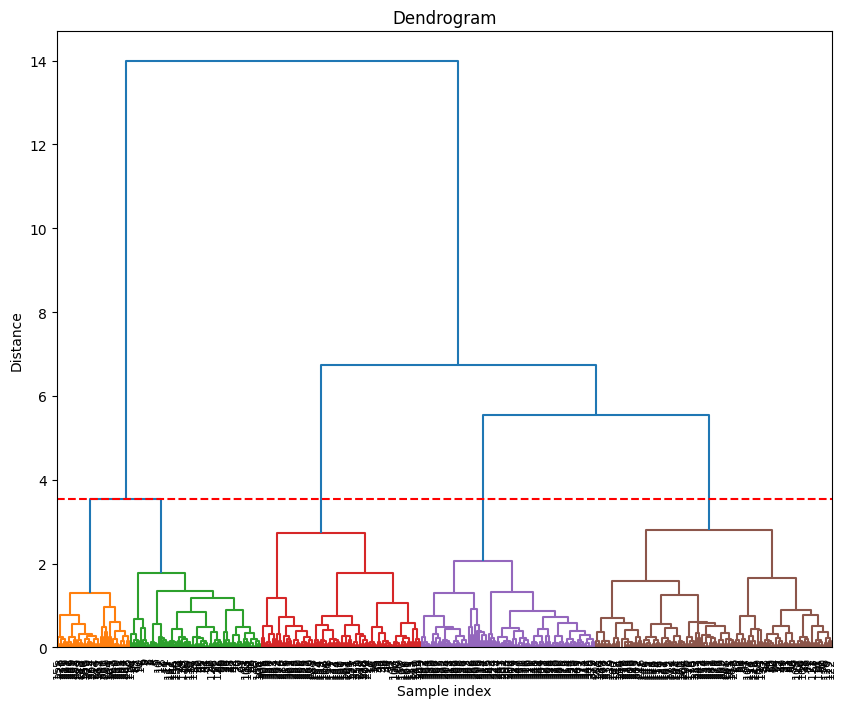

In [9]:
agg.dendrogram(5)

By using 'knife' method it is possible to make assesment of range of clusteers with releited silhouette_score and good shape of 'knifes'. The 'leakage' should be minimum and sahpe of all cluster approximetli equall

n_clusters = 2 average silhouette_score = 0.496


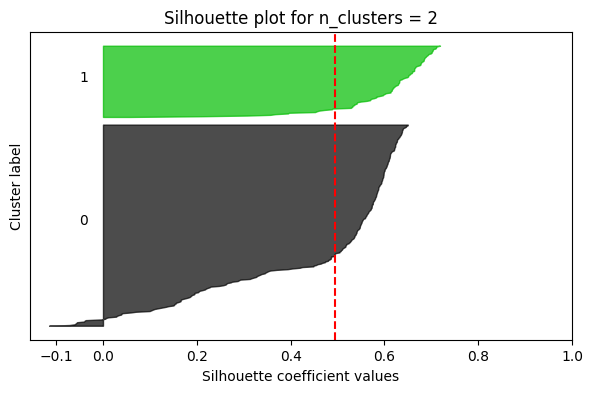

n_clusters = 3 average silhouette_score = 0.373


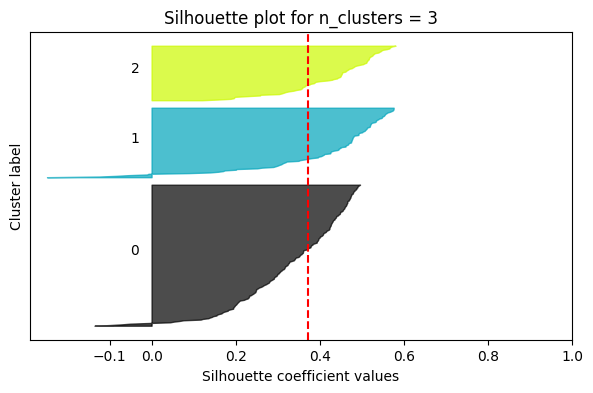

n_clusters = 4 average silhouette_score = 0.379


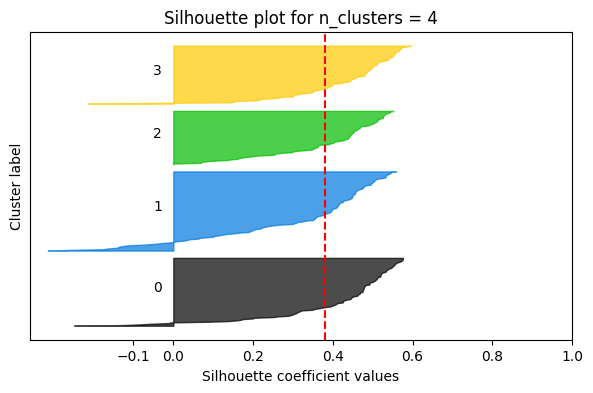

n_clusters = 5 average silhouette_score = 0.359


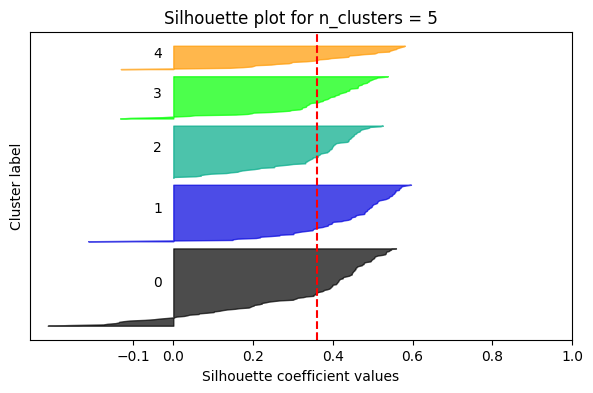

In [10]:
agg.knife(2,6)

In [11]:
agg.knife_df()

n_clusters  silhouette
0           2       0.496
1           3       0.373
2           4       0.379
3           5       0.359

In [12]:
agg.distance_df()

n_clusters  distance_threshold  silhouette
0          20            1.000000       0.240
1          12            1.444444       0.263
2           8            1.888889       0.290
3           7            2.333333       0.303
4           6            2.777778       0.308
5           5            3.222222       0.359
6           4            3.666667       0.379
7           4            4.111111       0.379
8           4            4.555556       0.379
9           4            5.000000       0.379

Check the optimal amount of cluster by scipy.cluster.hierarchy

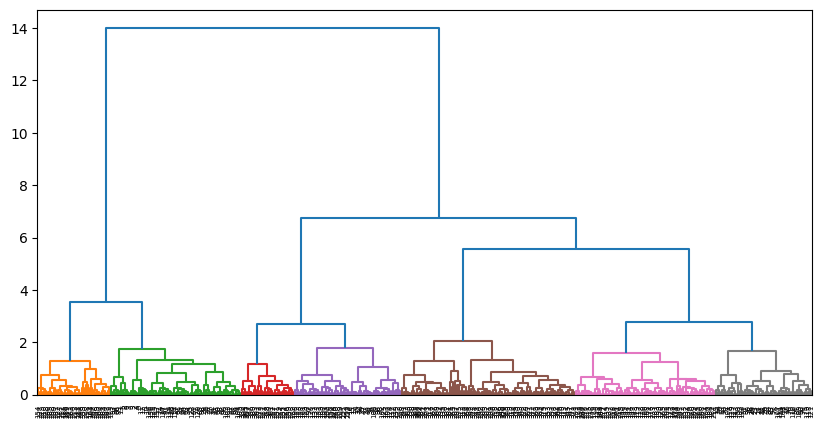

In [13]:
agg.linkage()

pca.explained_variance_ratio_ = [0.71670266 0.1287683 ]
np.sum(pca.explained_variance_ratio_ = 0.8454709616502694


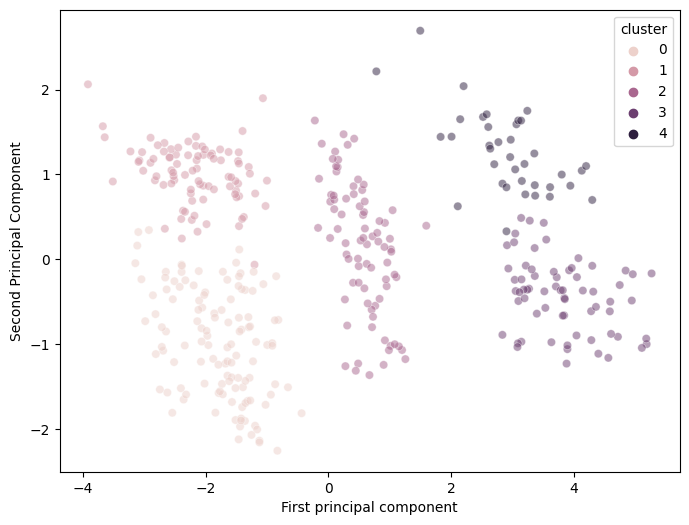

In [14]:
agg.build_knife(5)

In [15]:
df = agg.result
df

mpg  cylinders  displacement  horsepower  weight  acceleration   
0    18.0          8         307.0       130.0    3504          12.0  \
1    15.0          8         350.0       165.0    3693          11.5   
2    18.0          8         318.0       150.0    3436          11.0   
3    16.0          8         304.0       150.0    3433          12.0   
4    17.0          8         302.0       140.0    3449          10.5   
..    ...        ...           ...         ...     ...           ...   
387  27.0          4         140.0        86.0    2790          15.6   
388  44.0          4          97.0        52.0    2130          24.6   
389  32.0          4         135.0        84.0    2295          11.6   
390  28.0          4         120.0        79.0    2625          18.6   
391  31.0          4         119.0        82.0    2720          19.4   

     model_year  cluster  
0            70        3  
1            70        3  
2            70        3  
3            70        3  
4            70        3  
..          ...      ...  
387          82        1  
388          82        1  
389          82        1  
390          82        1  
391          82        1  

[392 rows x 8 columns]

Check cluster amount on PCA preprocessed data

pca.explained_variance_ratio_ = [0.71580512 0.12365591]
np.sum(pca.explained_variance_ratio_ = 0.8394610315374585


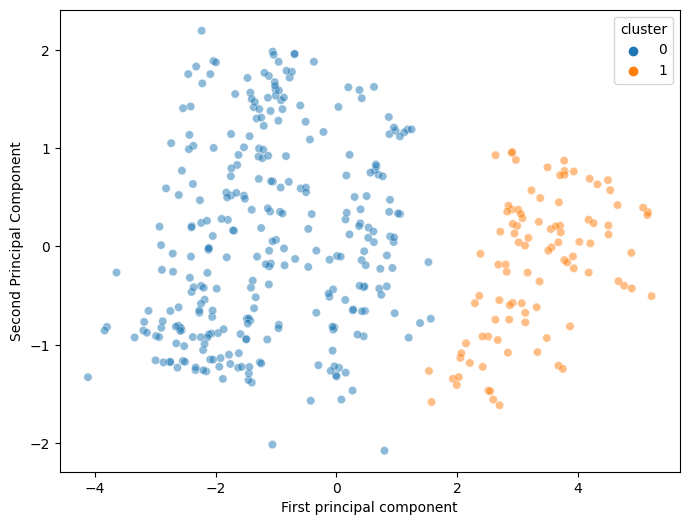

In [16]:
agg.build_simple(2)

In [17]:
agg.result_simple

mpg  cylinders  displacement  horsepower  weight  acceleration   
0    18.0          8         307.0       130.0    3504          12.0  \
1    15.0          8         350.0       165.0    3693          11.5   
2    18.0          8         318.0       150.0    3436          11.0   
3    16.0          8         304.0       150.0    3433          12.0   
4    17.0          8         302.0       140.0    3449          10.5   
..    ...        ...           ...         ...     ...           ...   
387  27.0          4         140.0        86.0    2790          15.6   
388  44.0          4          97.0        52.0    2130          24.6   
389  32.0          4         135.0        84.0    2295          11.6   
390  28.0          4         120.0        79.0    2625          18.6   
391  31.0          4         119.0        82.0    2720          19.4   

     model_year  cluster  
0            70        1  
1            70        1  
2            70        1  
3            70        1  
4            70        1  
..          ...      ...  
387          82        0  
388          82        0  
389          82        0  
390          82        0  
391          82        0  

[392 rows x 8 columns]

Feature correlation

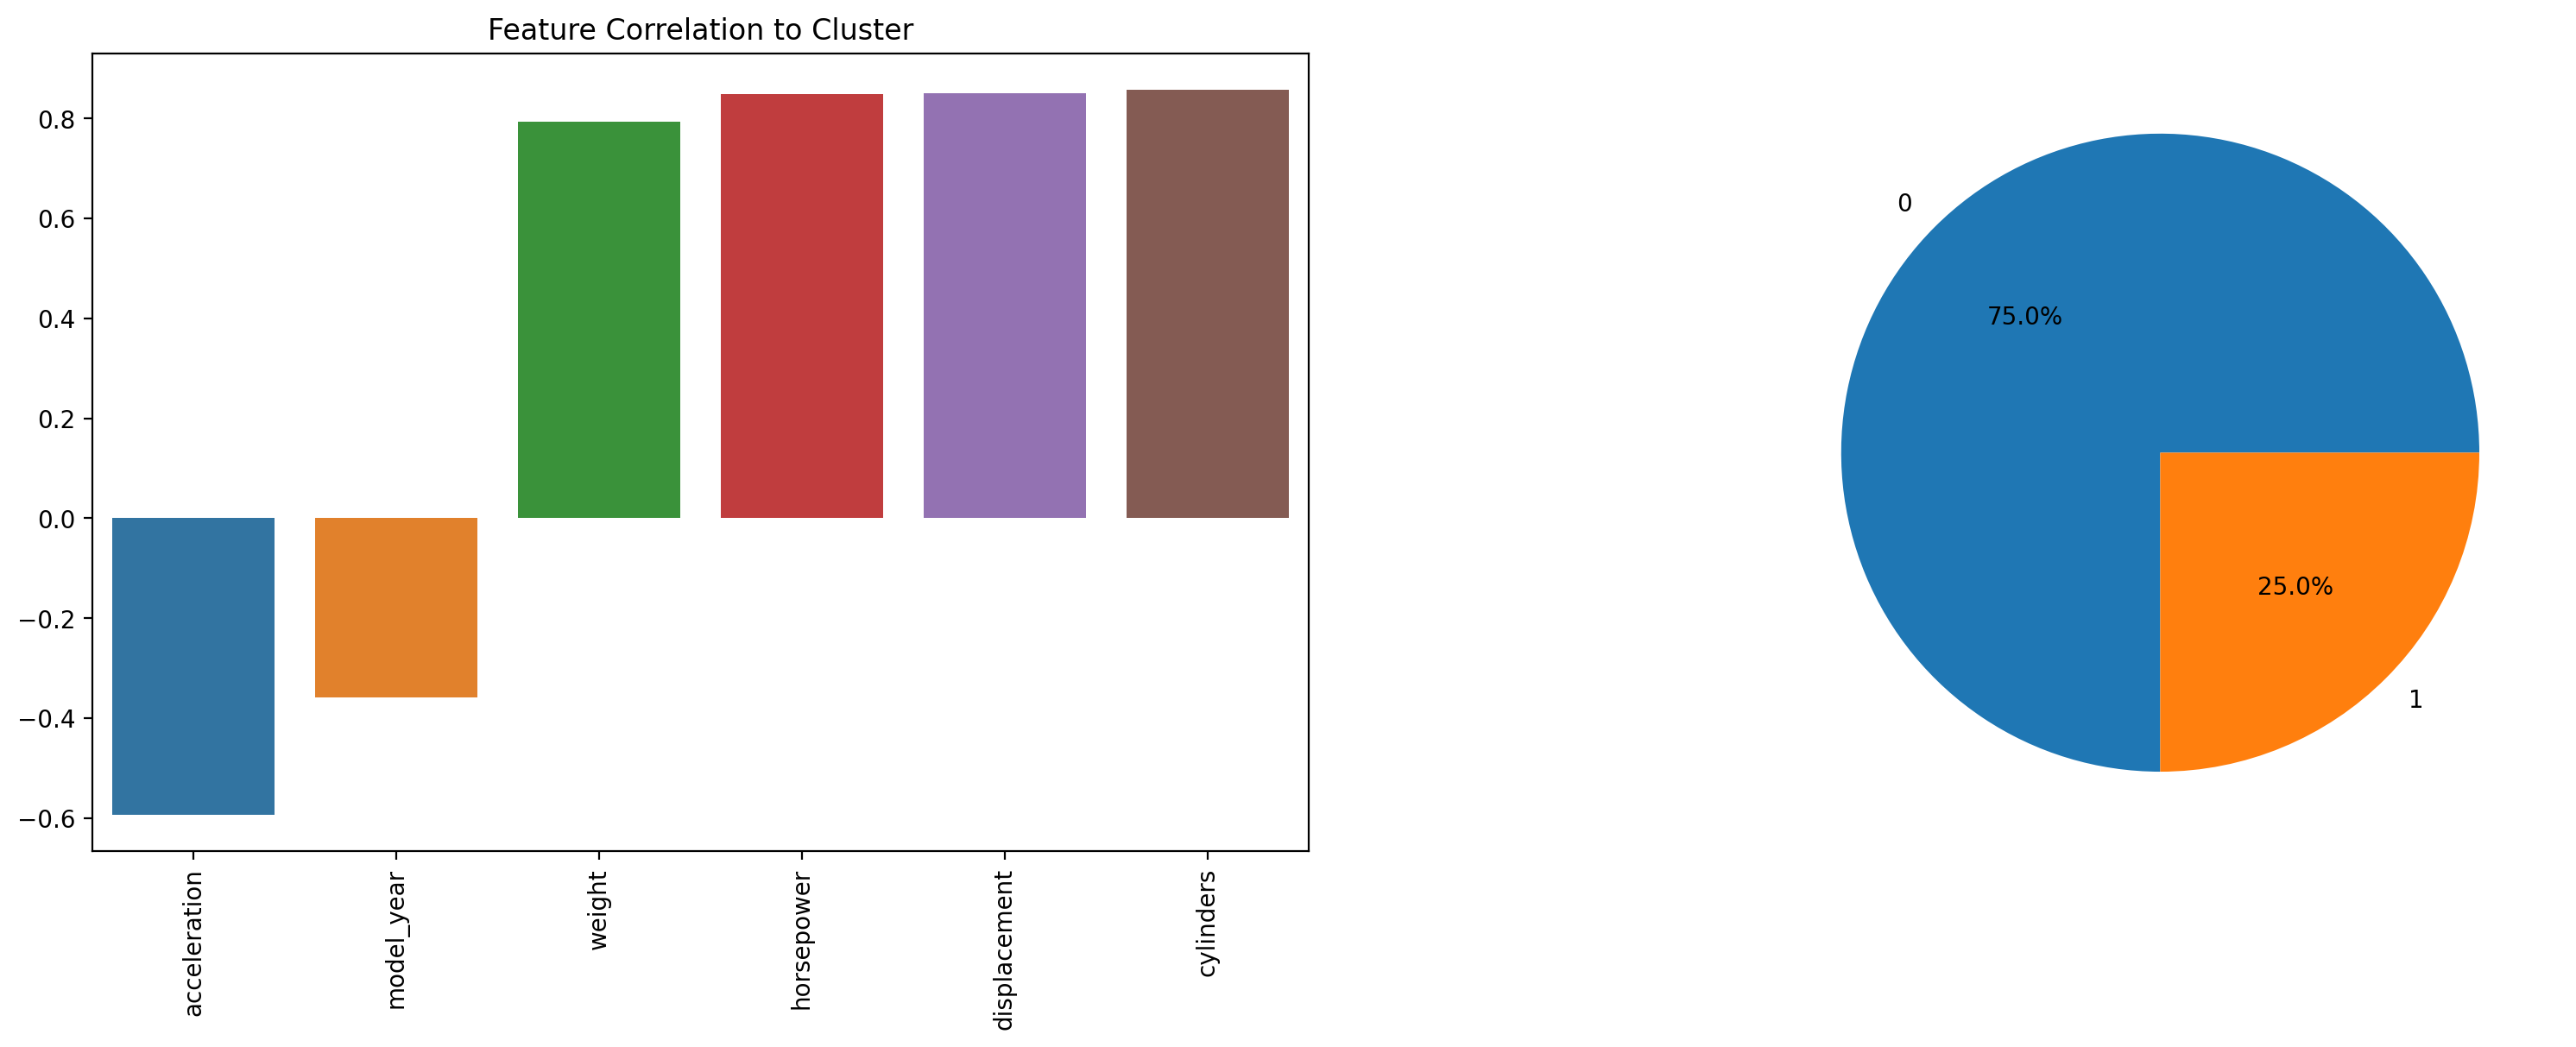

In [18]:
agg.pie('simple')

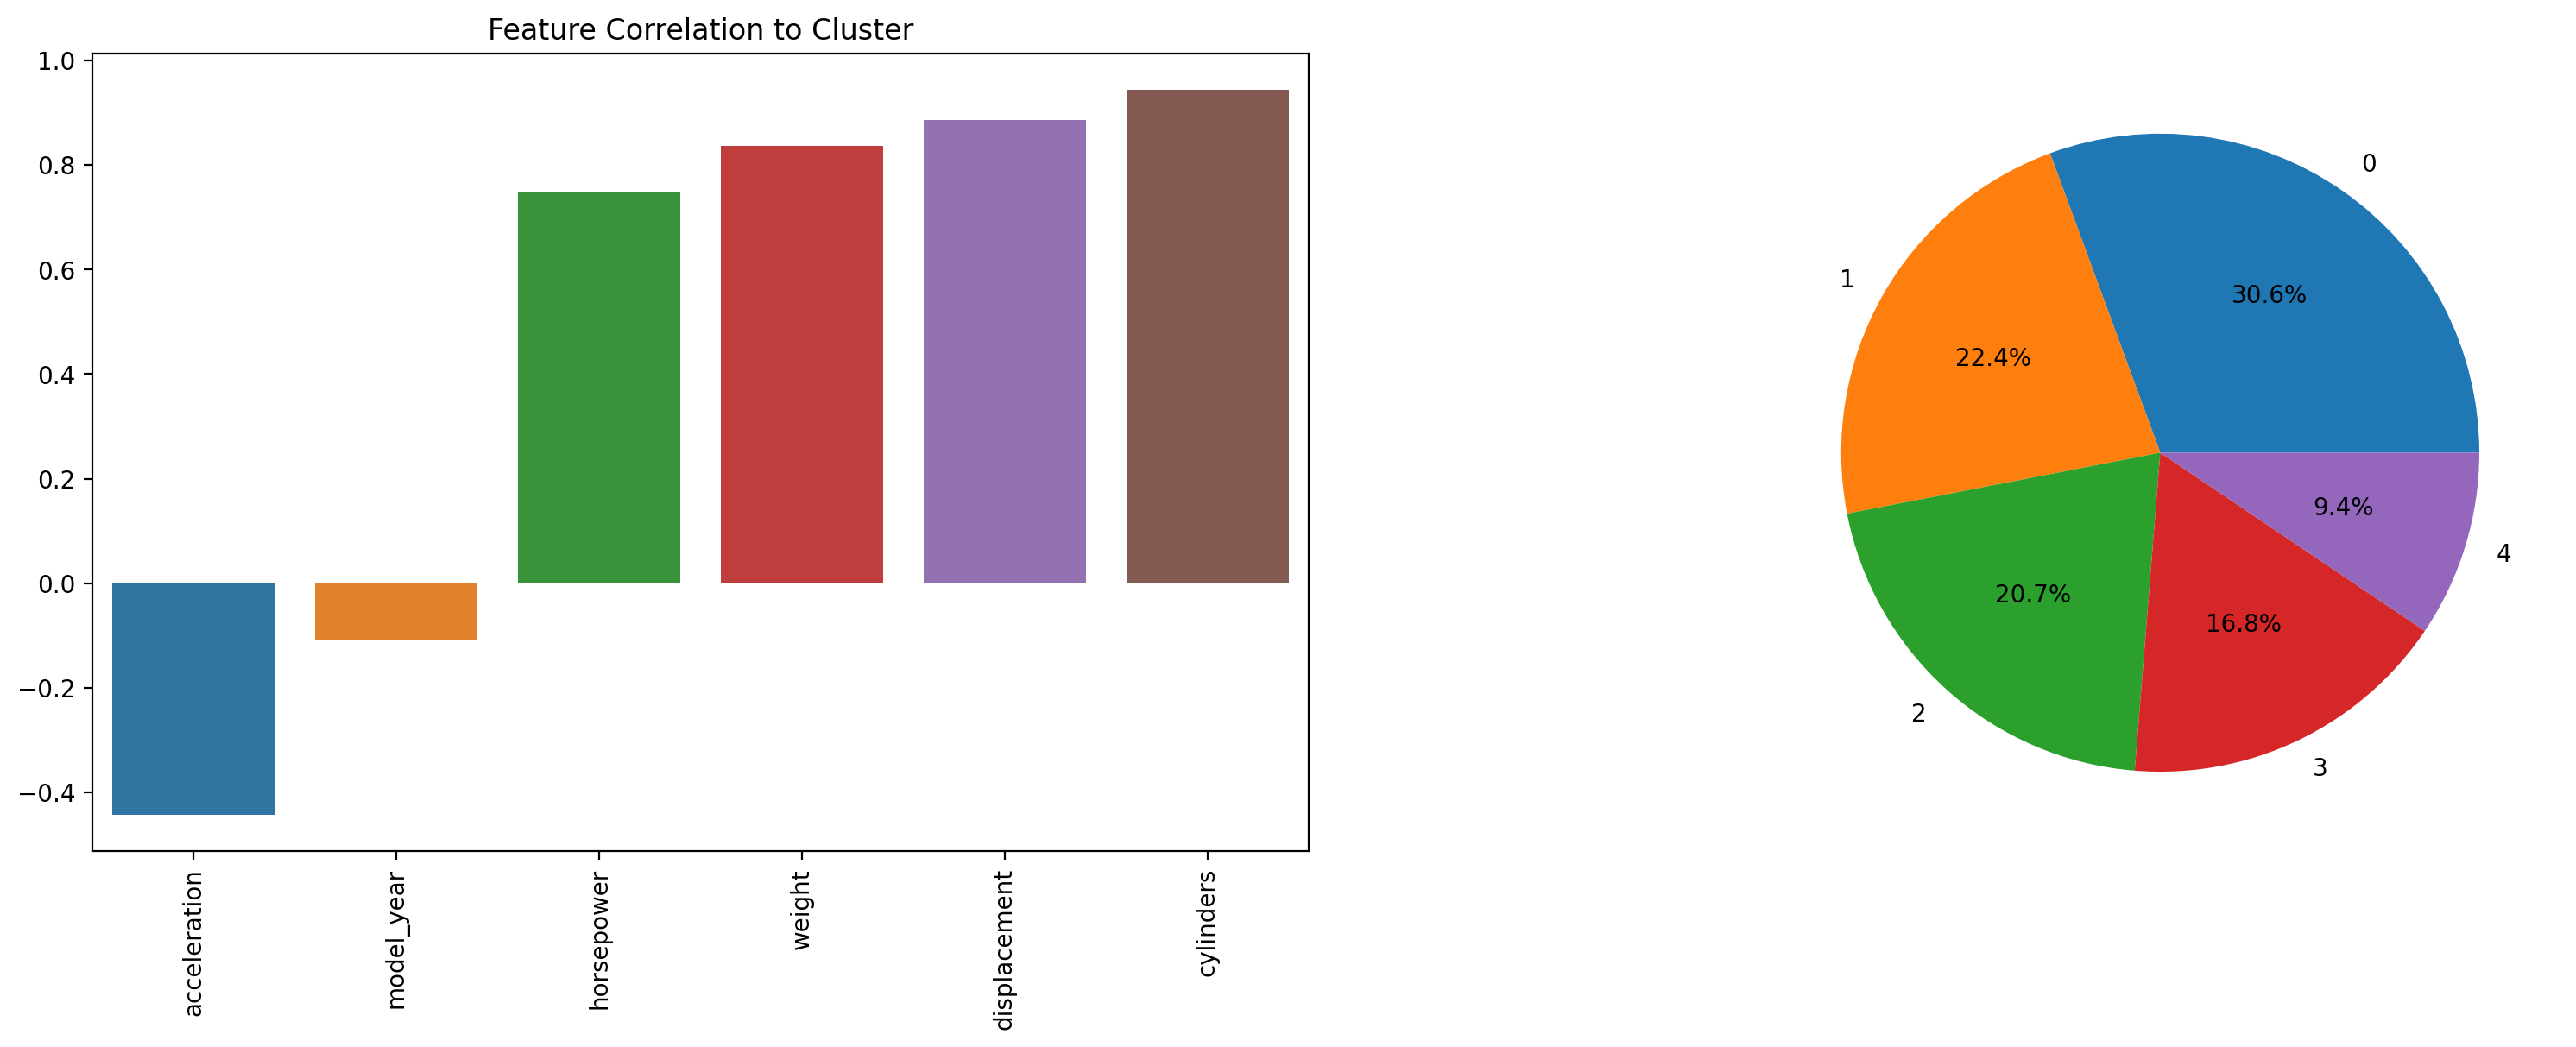

In [19]:
agg.pie('knife')

<Axes: ylabel='cluster'>

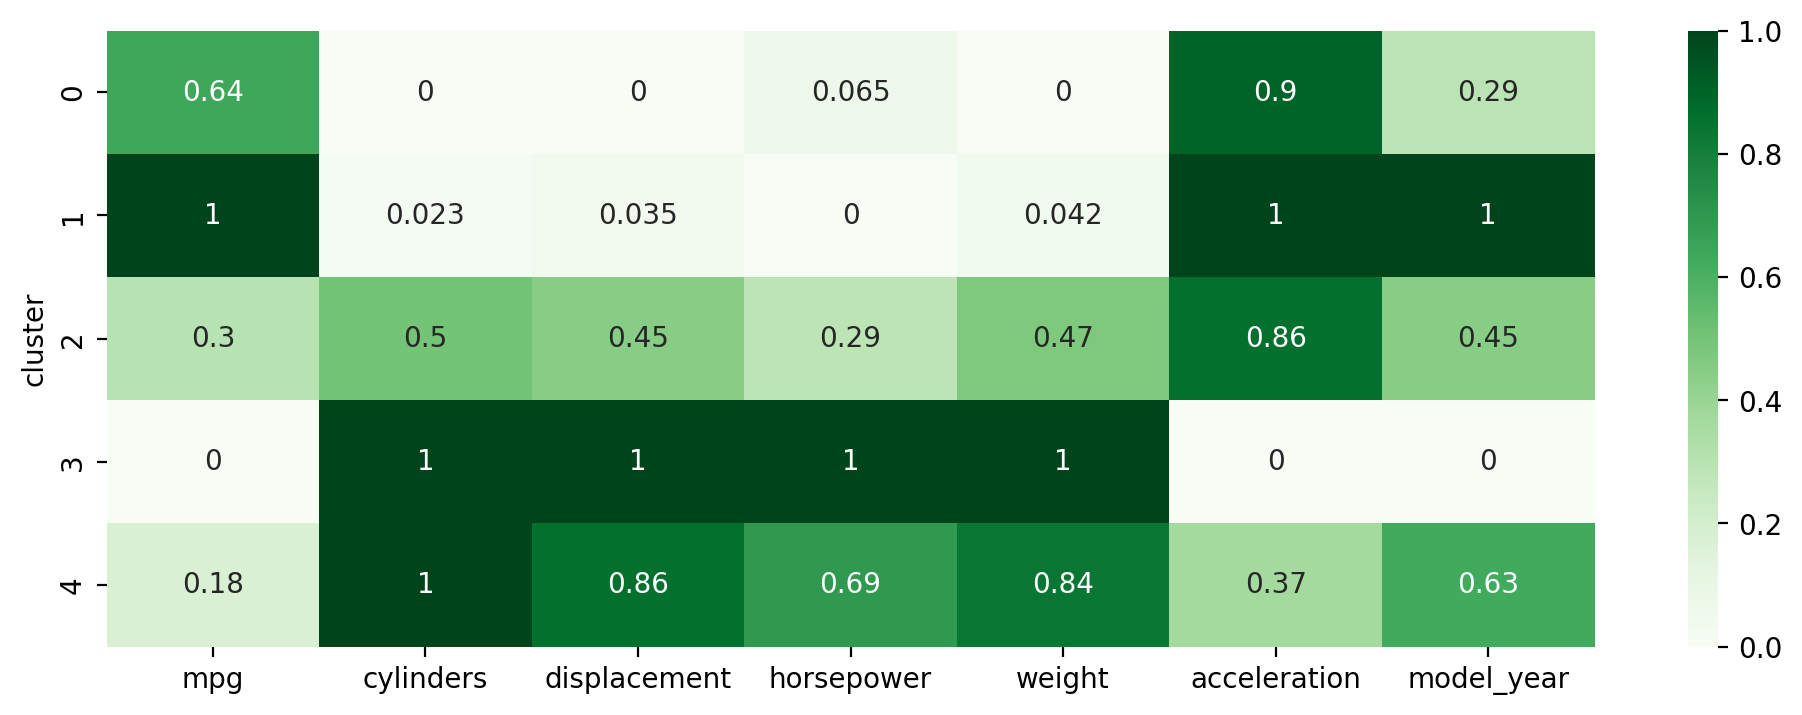

In [20]:
agg.heat('knife')

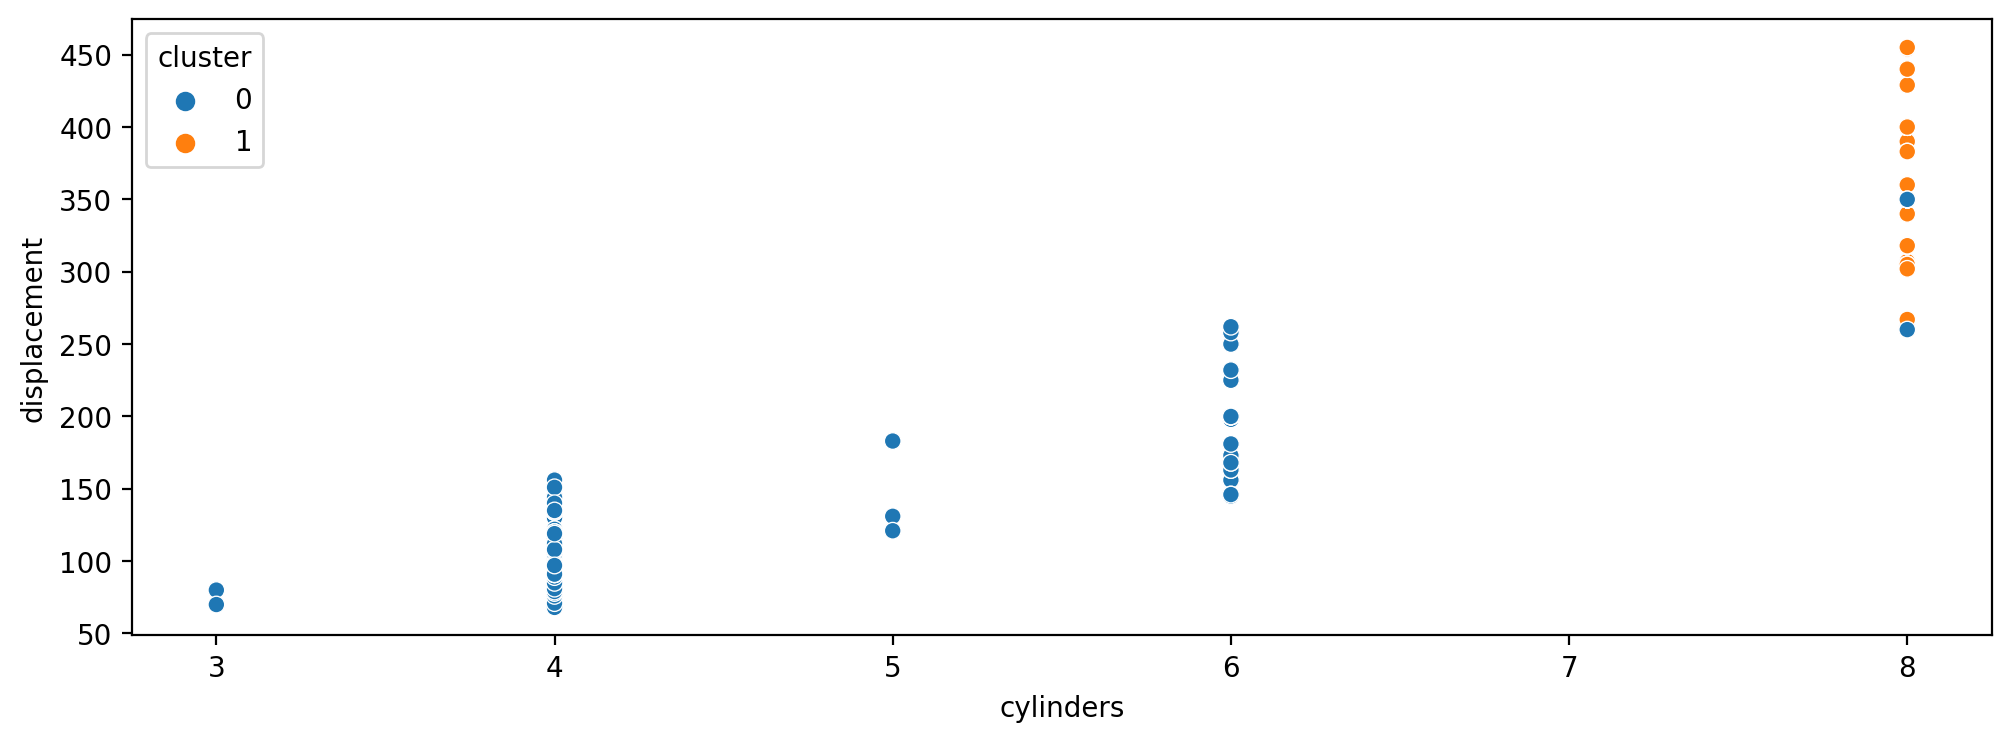

In [21]:
agg.feature_corr('simple')

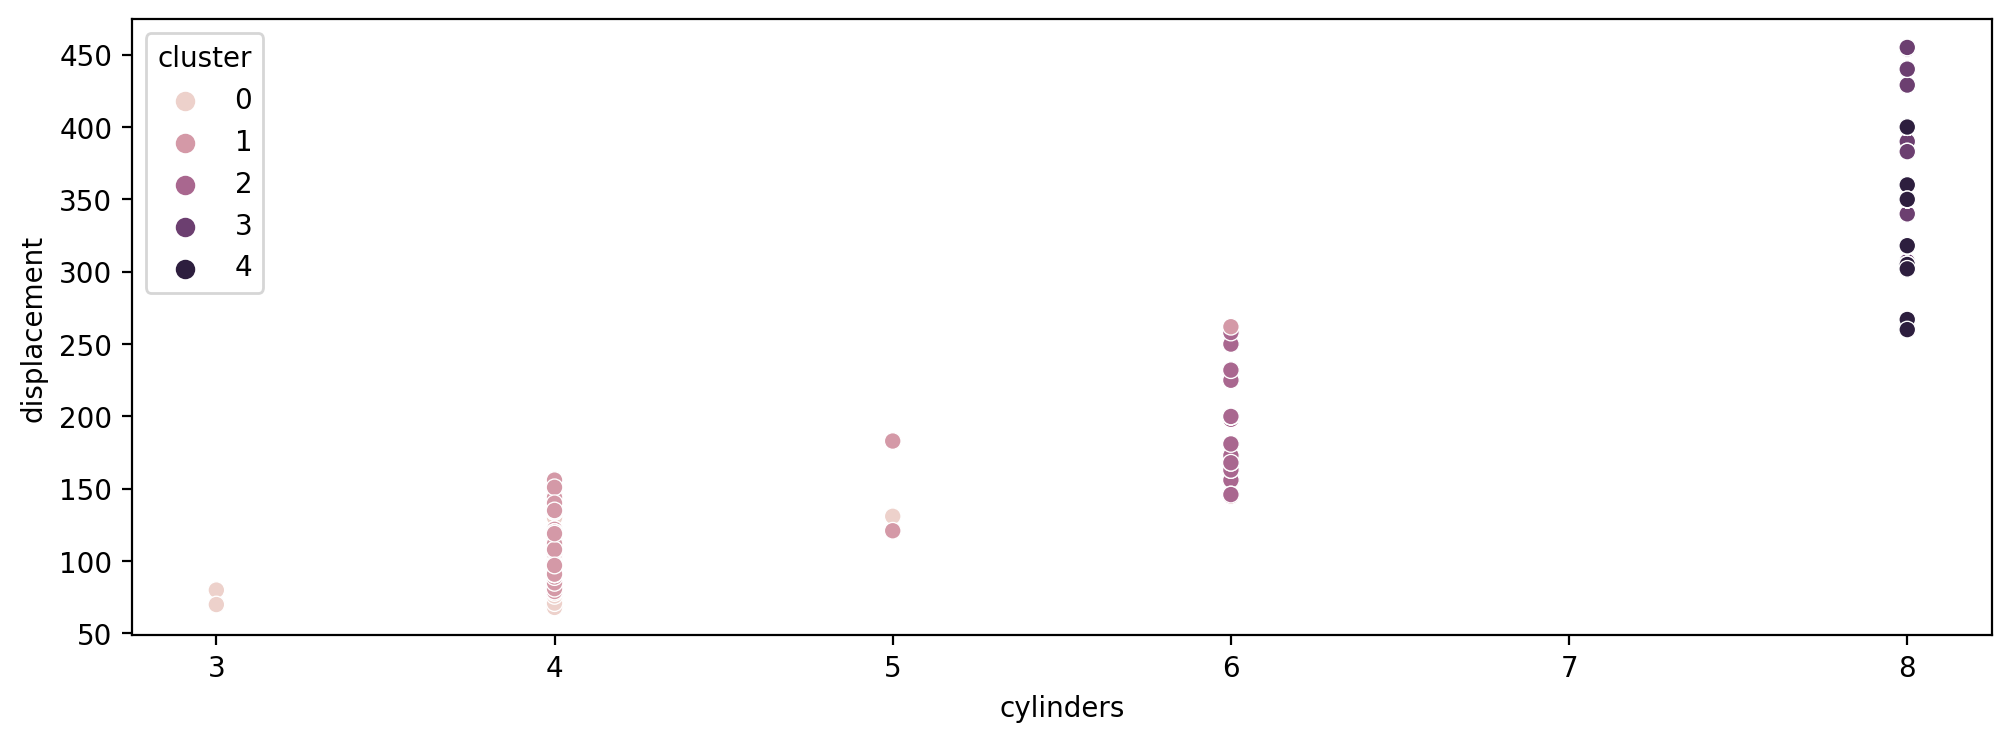

In [22]:
agg.feature_corr('knife')

pca.explained_variance_ratio_ = [0.71670266 0.1287683 ]
np.sum(pca.explained_variance_ratio_ = 0.8454709616502694


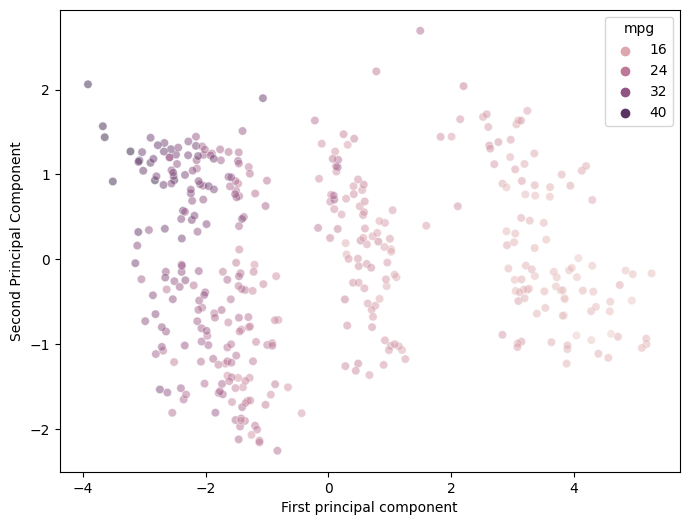

In [23]:
agg.simple_check('knife','mpg')

pca.explained_variance_ratio_ = [0.72285786 0.11052641]
np.sum(pca.explained_variance_ratio_ = 0.8333842661603681


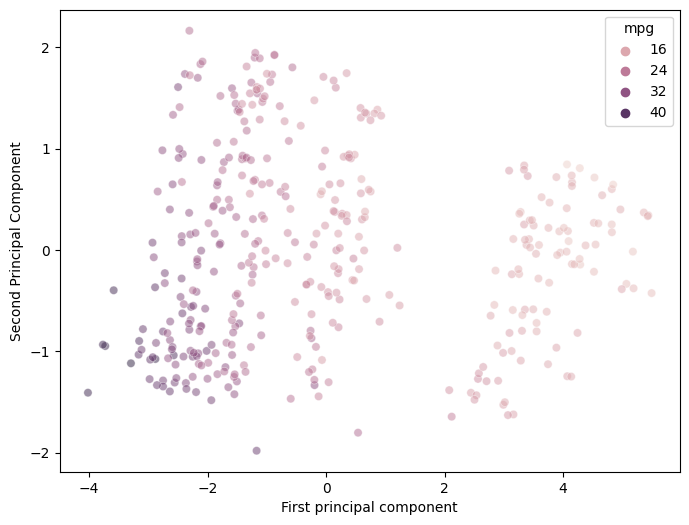

In [24]:
agg.simple_check('simple','mpg')

### Get the latest result of clusterisation integrated to original dataframe

In [50]:
agg.result

mpg  cylinders  displacement  horsepower  weight  acceleration   
0    18.0          8         307.0       130.0    3504          12.0  \
1    15.0          8         350.0       165.0    3693          11.5   
2    18.0          8         318.0       150.0    3436          11.0   
3    16.0          8         304.0       150.0    3433          12.0   
4    17.0          8         302.0       140.0    3449          10.5   
..    ...        ...           ...         ...     ...           ...   
387  27.0          4         140.0        86.0    2790          15.6   
388  44.0          4          97.0        52.0    2130          24.6   
389  32.0          4         135.0        84.0    2295          11.6   
390  28.0          4         120.0        79.0    2625          18.6   
391  31.0          4         119.0        82.0    2720          19.4   

     model_year  cluster  
0            70        3  
1            70        3  
2            70        3  
3            70        3  
4            70        3  
..          ...      ...  
387          82        1  
388          82        1  
389          82        1  
390          82        1  
391          82        1  

[392 rows x 8 columns]

In [26]:
k = k_mean(df_w_dummies.drop(['origin_europe','origin_japan','origin_usa'],axis=1))

To use Aglomerative clusterisation data required MinMax preprocessing

In [27]:
k.standard()

By using 'knife' method it is possible to make assesment of range of clusteers with releited silhouette_score and good shape of 'knifes'. The 'leakage' should be minimum and sahpe of all cluster approximetli equall

n_clusters = 2 ssd = 1273.2 average silhouette_score = 0.462


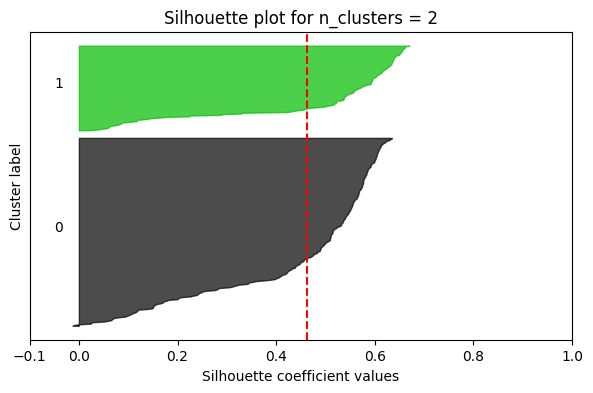

n_clusters = 3 ssd = 928.6 average silhouette_score = 0.354


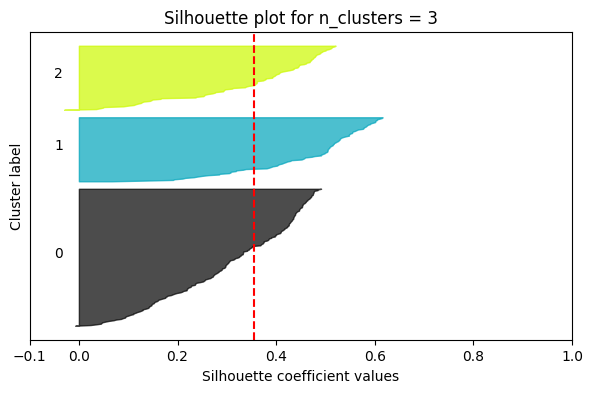

n_clusters = 4 ssd = 725.3 average silhouette_score = 0.349


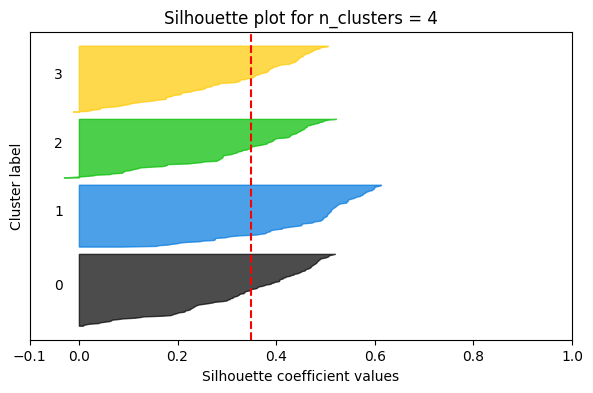

In [28]:
k.knife(2,5)

In [29]:
k.knife_df()

n_clusters     ssd  silhouette   diff
0           2  1273.2       0.462    NaN
1           3   928.6       0.354 -344.6
2           4   725.3       0.349 -203.3

Check the proper amount of cluster by assesment of ideal distances

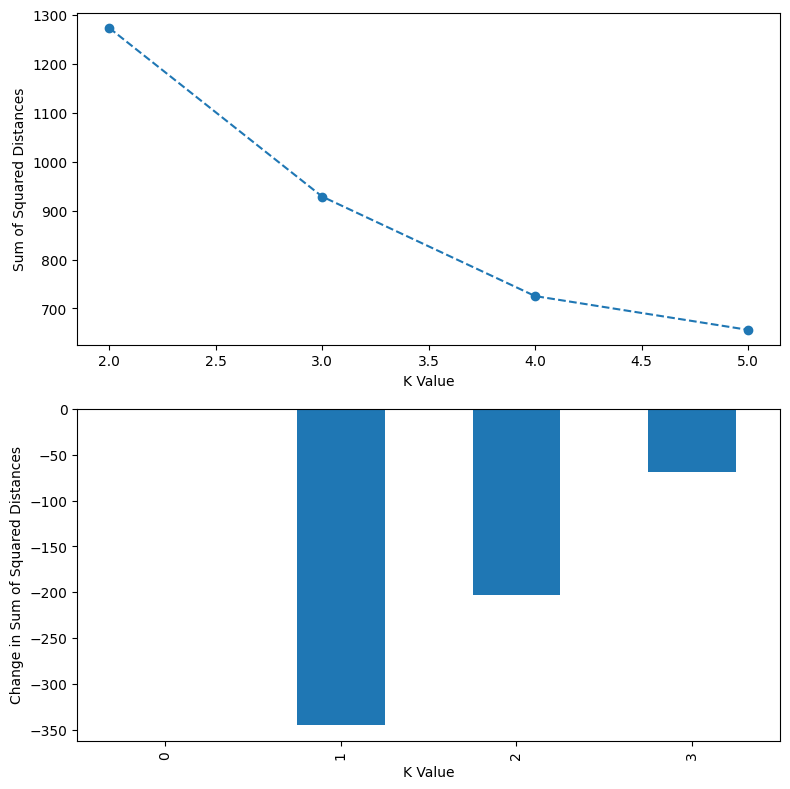

In [30]:
k.mount(2,6)

In [31]:
k.mount_df()

n_clusters     ssd  silhouette   diff
0           2  1273.2       0.462    NaN
1           3   928.6       0.354 -344.6
2           4   725.3       0.349 -203.3
3           5   656.3       0.305  -69.0

Build choosen clusterisation

pca.explained_variance_ratio_ = [0.99753628 0.00206328]
np.sum(pca.explained_variance_ratio_ = 0.9995995639635098


/Users/aleksejkitajskij/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


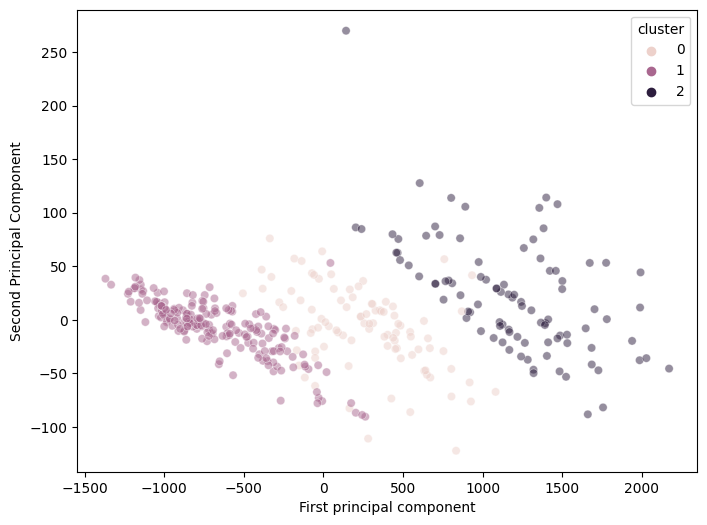

In [32]:
k.build_knife(3)

/Users/aleksejkitajskij/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


pca.explained_variance_ratio_ = [0.71580512 0.12365591]
np.sum(pca.explained_variance_ratio_ = 0.8394610315374585


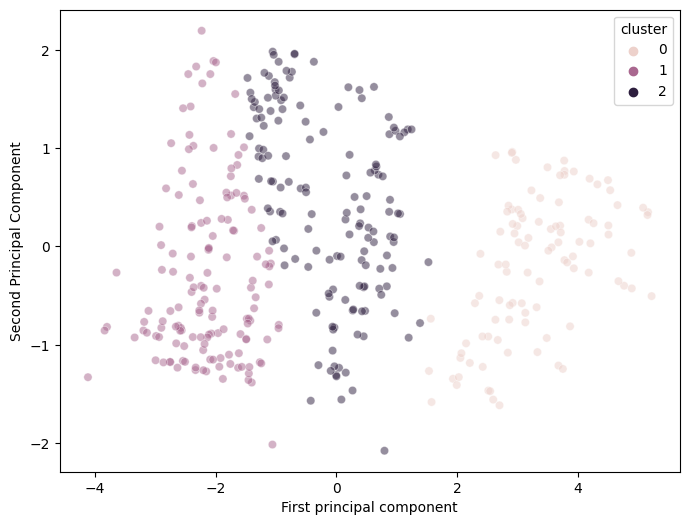

In [33]:
k.build_simple(3)

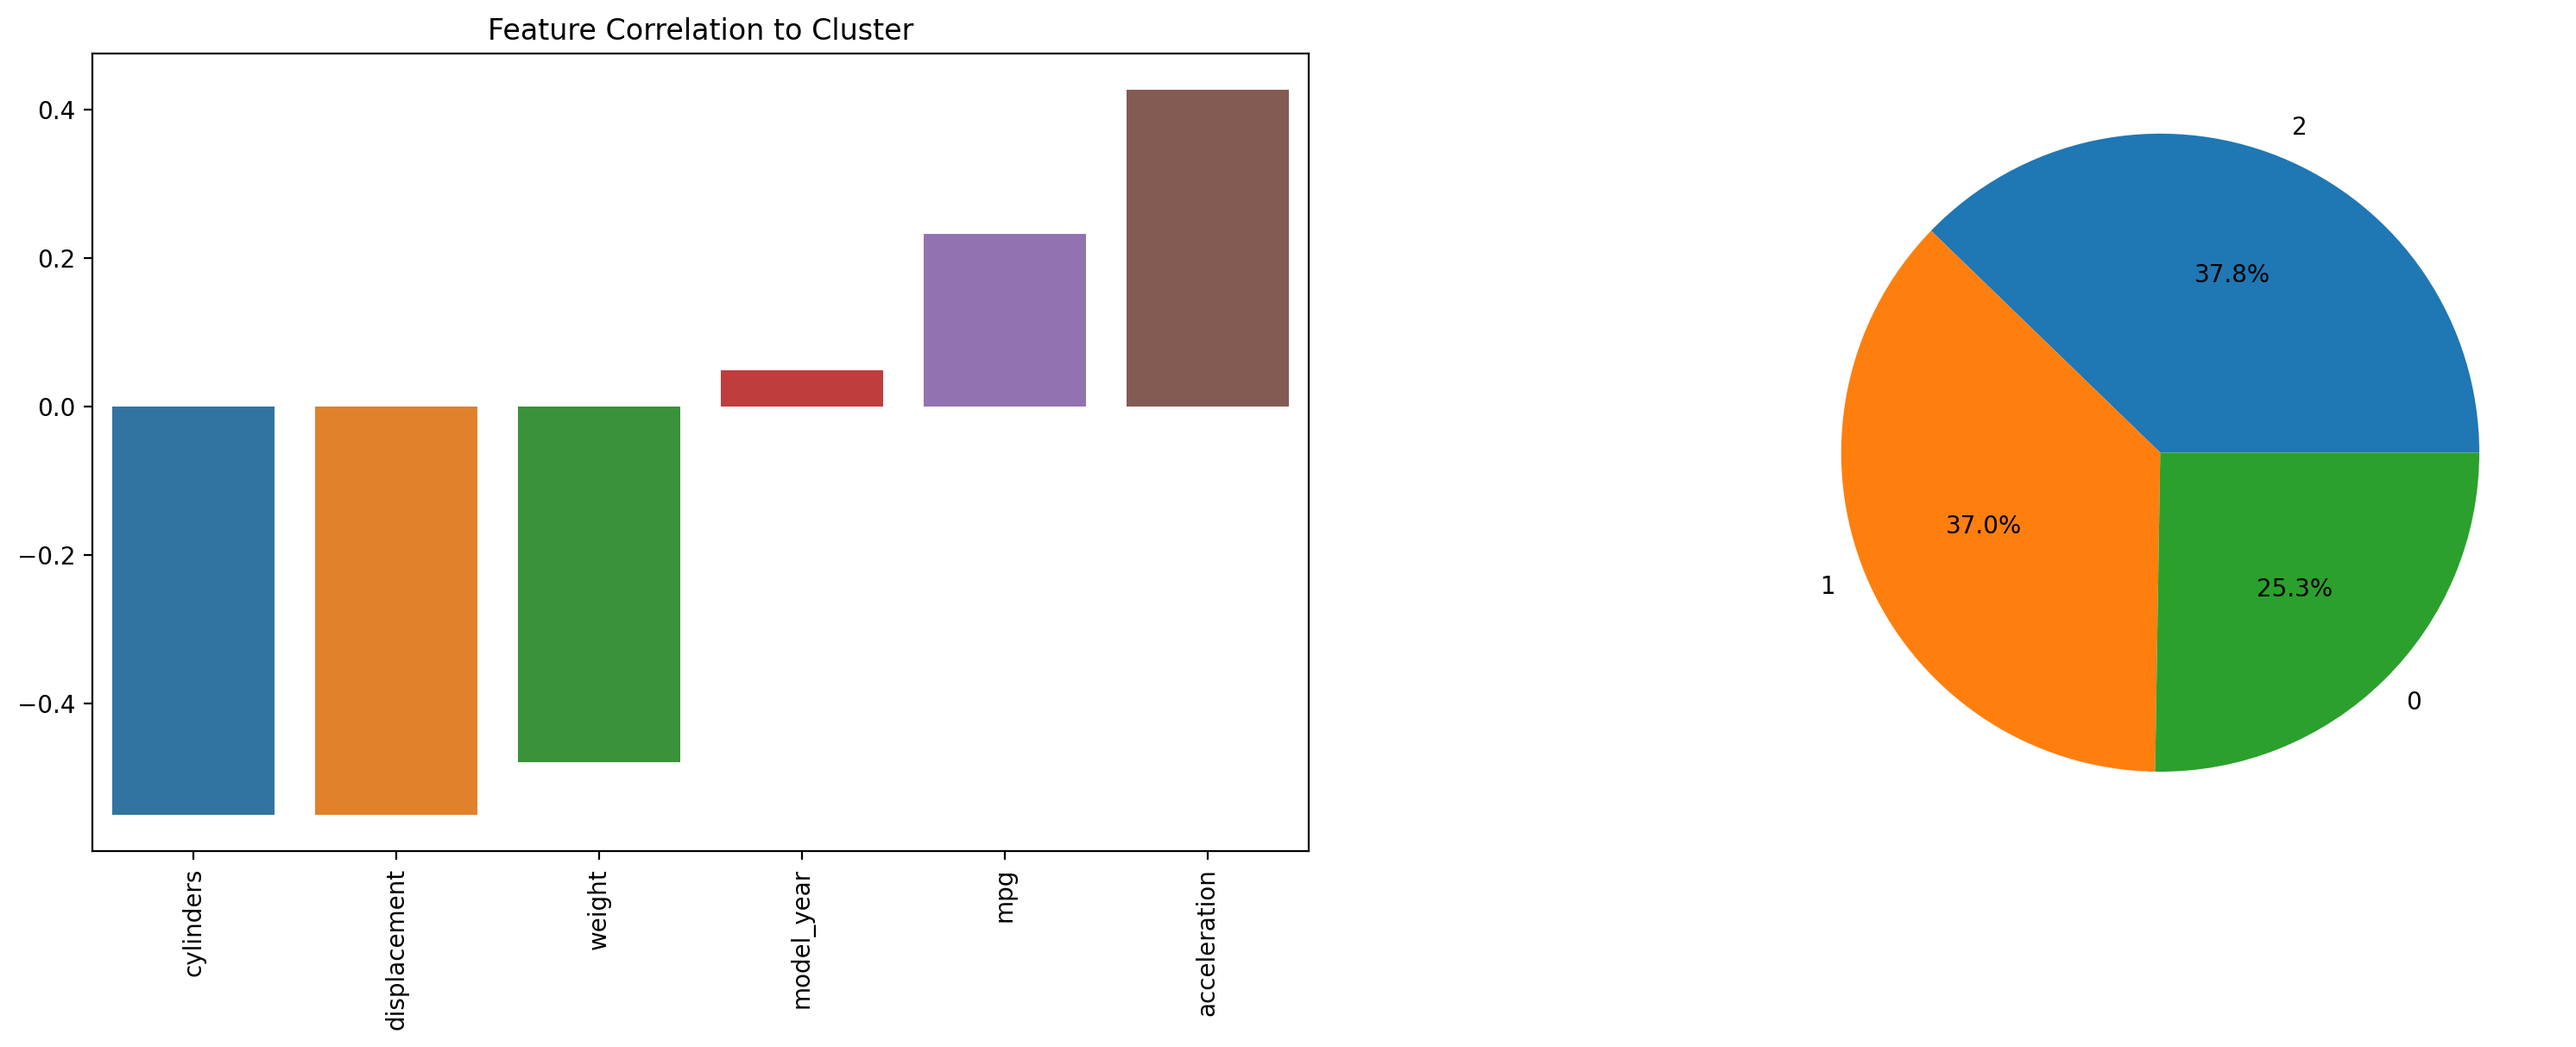

In [34]:
k.pie('simple')

<Axes: ylabel='cluster'>

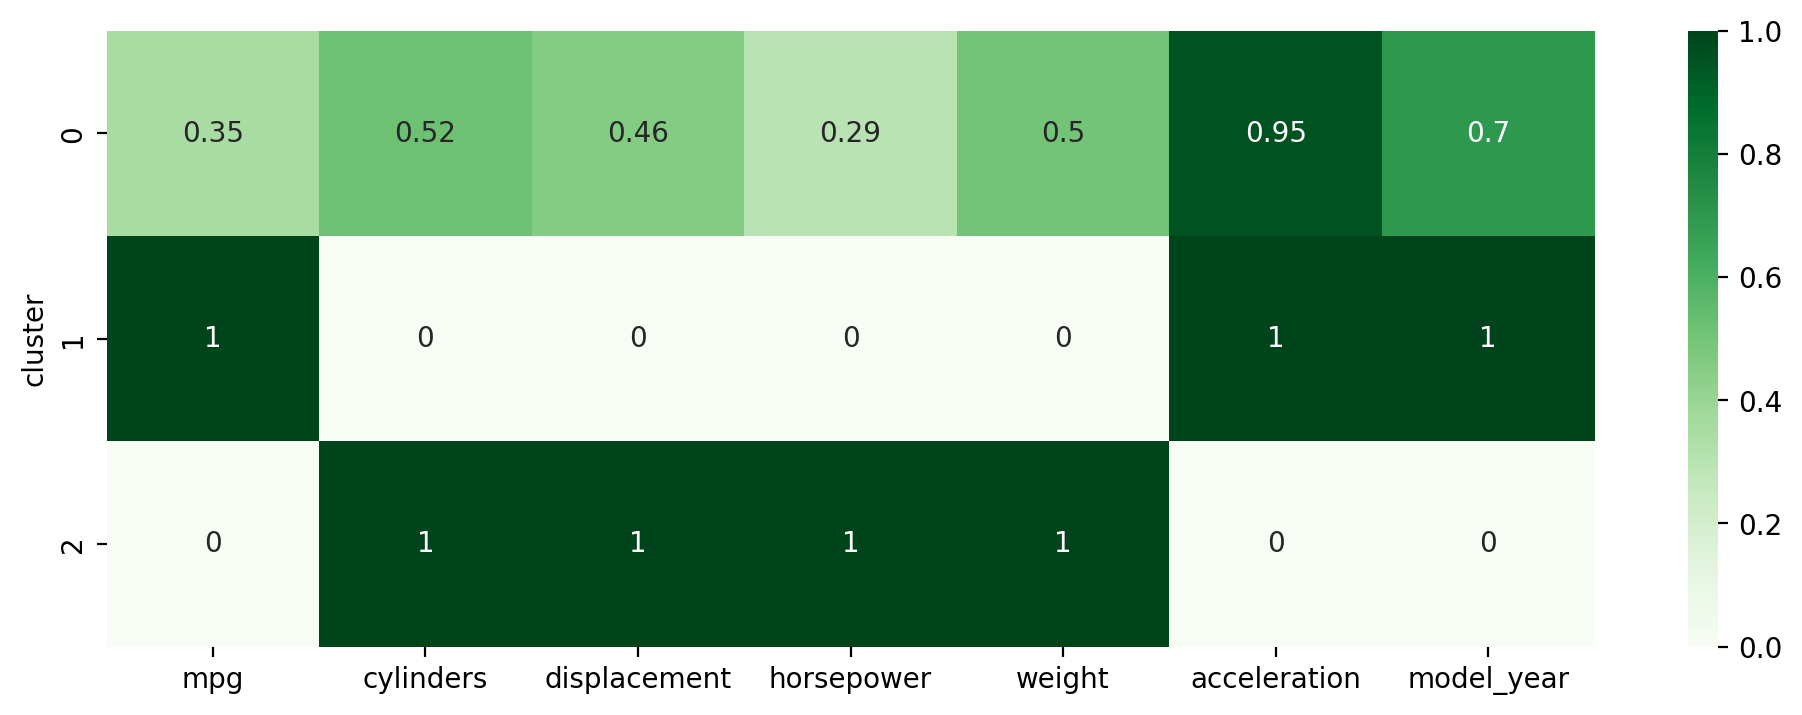

In [35]:
k.heat('knife')

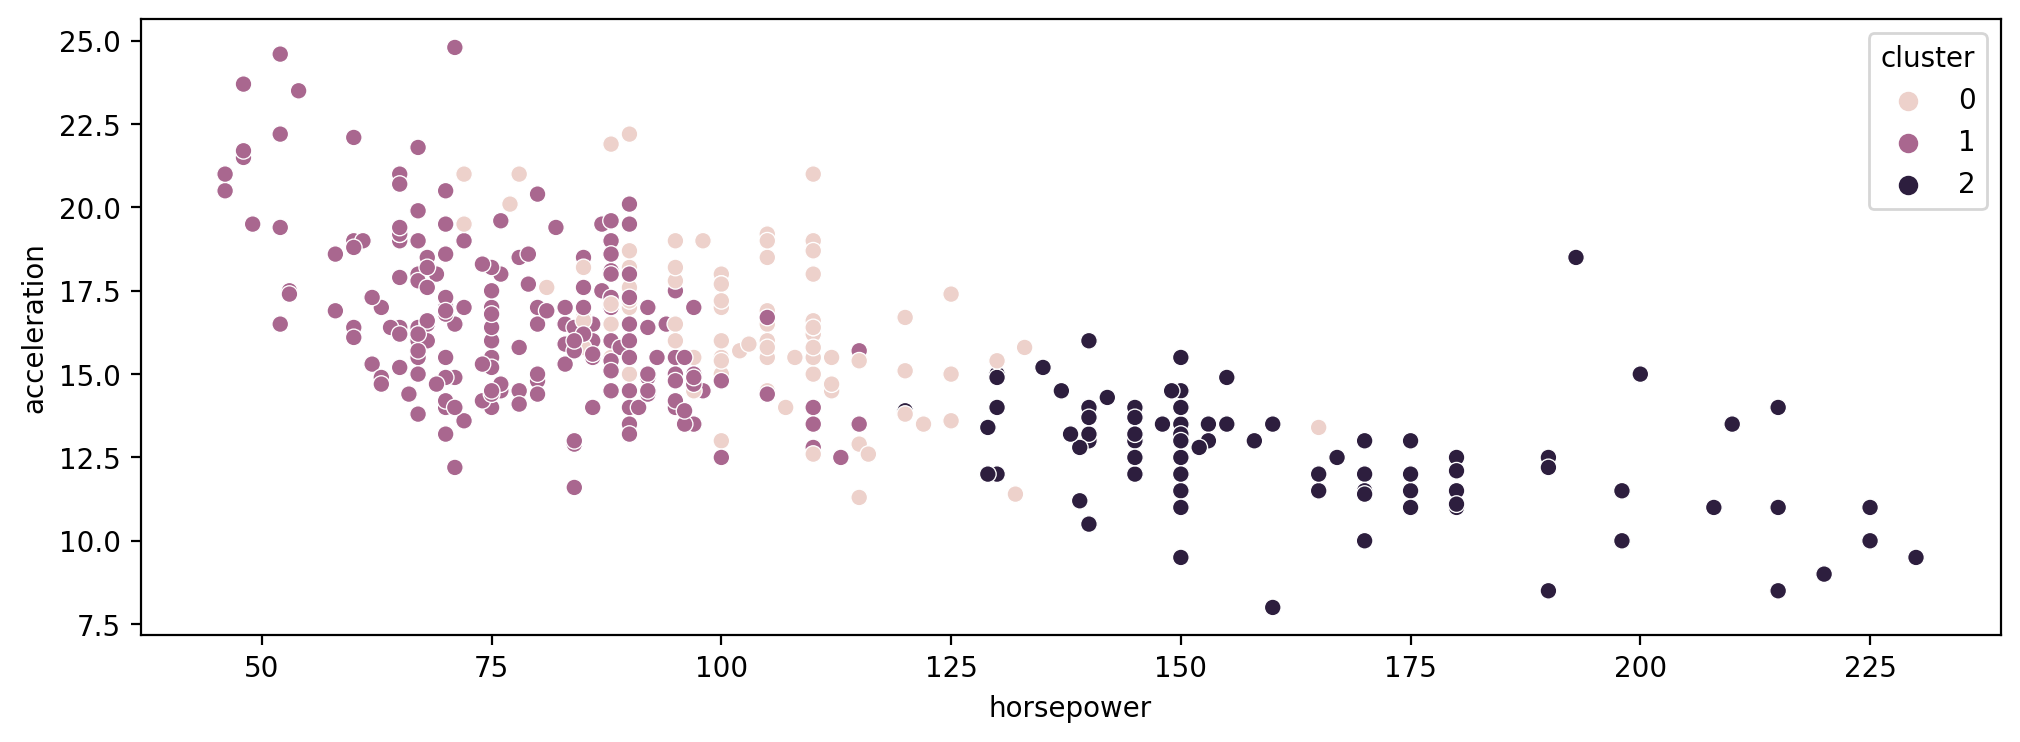

In [36]:
k.feature_corr('knife')

Check choosen amount of cluster with preprocessed PCA data

pca.explained_variance_ratio_ = [0.99753628 0.00206328]
np.sum(pca.explained_variance_ratio_ = 0.9995995639635098


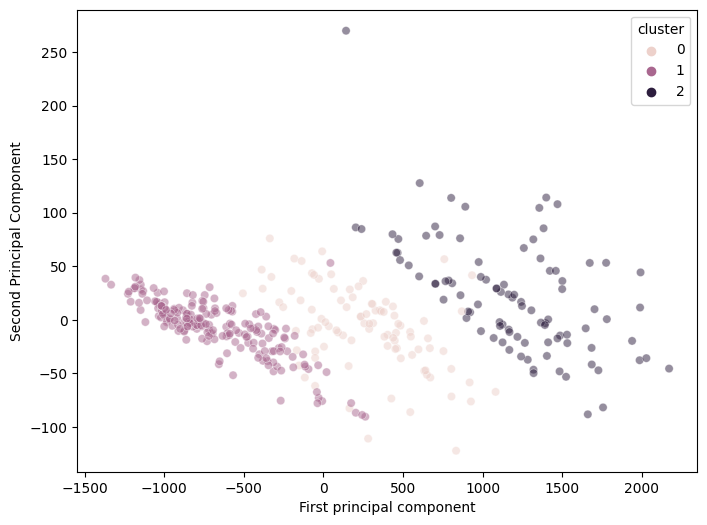

In [37]:
k.simple_check('knife')

In [38]:
db = dbscan(df_w_dummies.drop(['origin_europe','origin_japan','origin_usa'],axis=1))

In [39]:
db.standard()

Check best amount of cluster by data density with DBscan

check_n = 0.45 average silhouette_score = -0.442


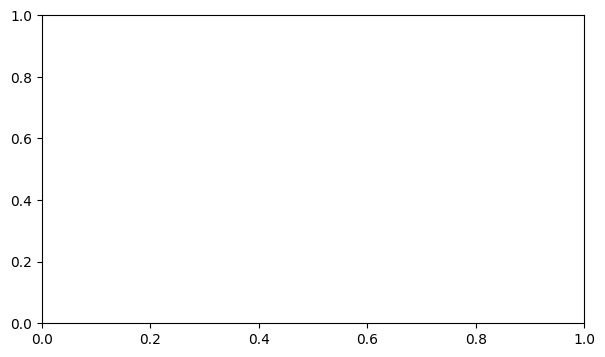

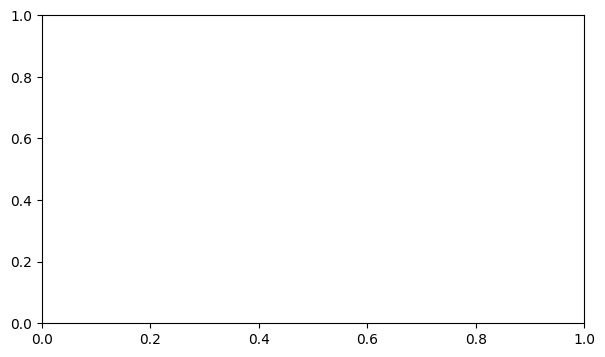

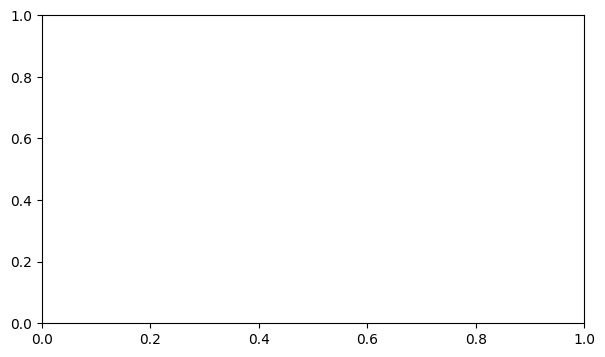

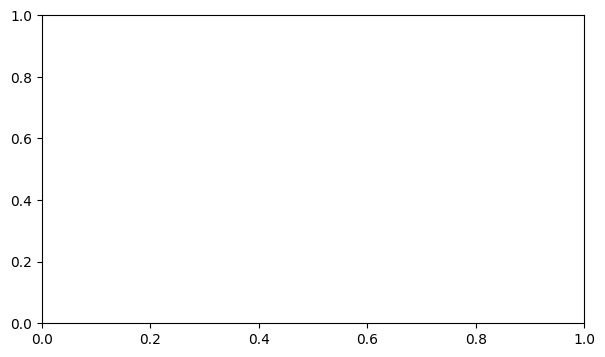

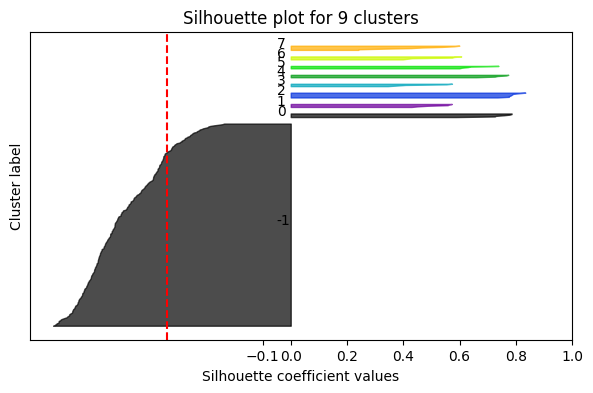

check_n = 0.56 average silhouette_score = -0.166


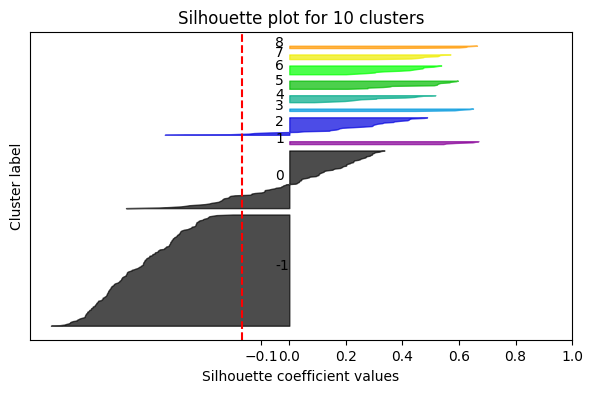

check_n = 0.67 average silhouette_score = 0.054


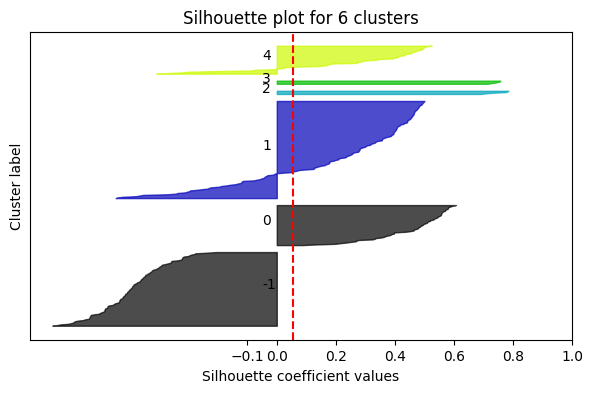

check_n = 0.78 average silhouette_score = 0.167


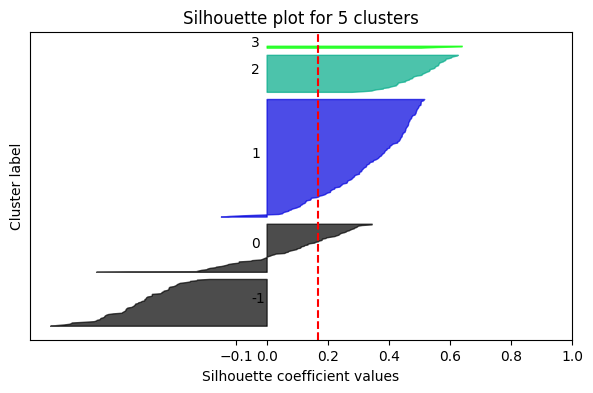

check_n = 0.89 average silhouette_score = 0.154


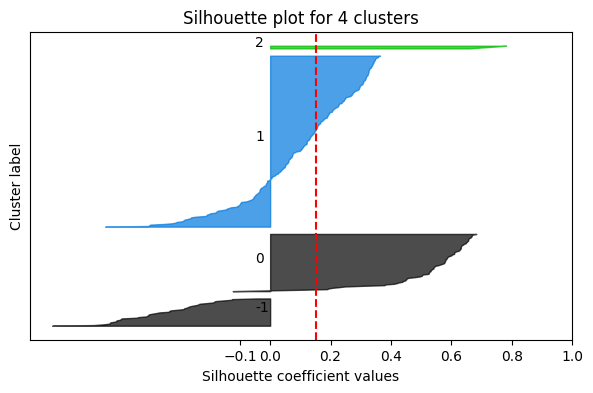

check_n = 1.0 average silhouette_score = 0.373


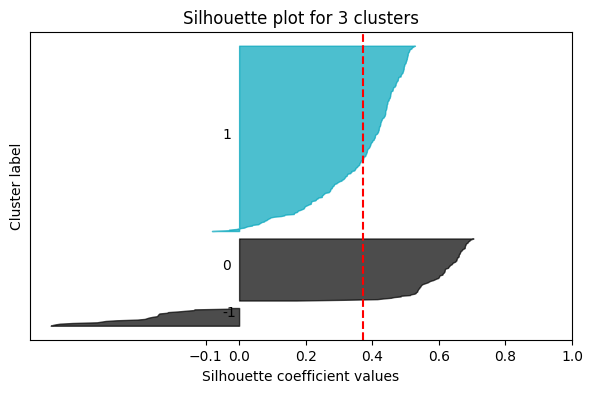

In [40]:
db.knife()

In [41]:
db.knife_df()

check_values silhouette n_clusters   outliers
0         0.45     -0.442          9  86.989796
1         0.56     -0.166         10  48.979592
2         0.67      0.054          6  29.846939
3         0.78      0.167          5  18.622449
4         0.89      0.154          4  10.714286
5          1.0      0.373          3   6.887755

pca.explained_variance_ratio_ = [0.99753652 0.00206325]
np.sum(pca.explained_variance_ratio_ = 0.9995997666059159


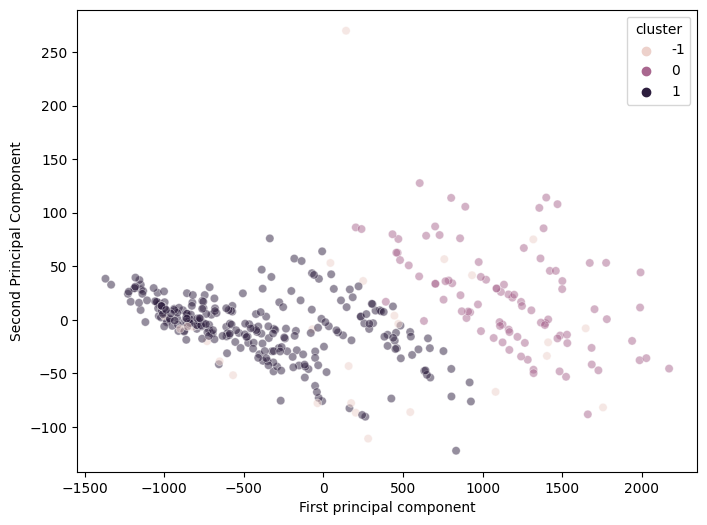

In [42]:
db.build_knife(1)

Check amount of outliers with selected in knife method target parametr

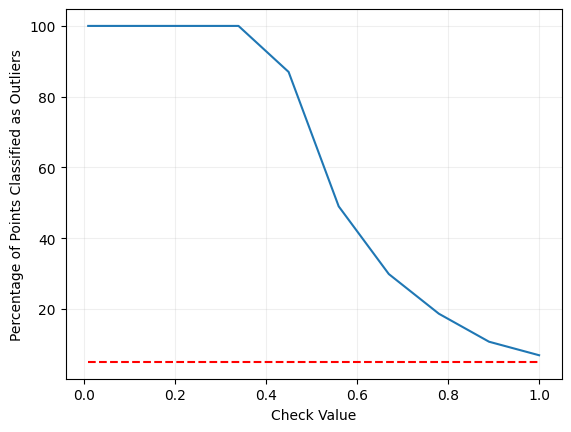

In [43]:
db.outliers(5)

Check the clusterisation with choosen target parameter with preprocesse PCA data

pca.explained_variance_ratio_ = [0.71580512 0.12365591]
np.sum(pca.explained_variance_ratio_ = 0.8394610315374585


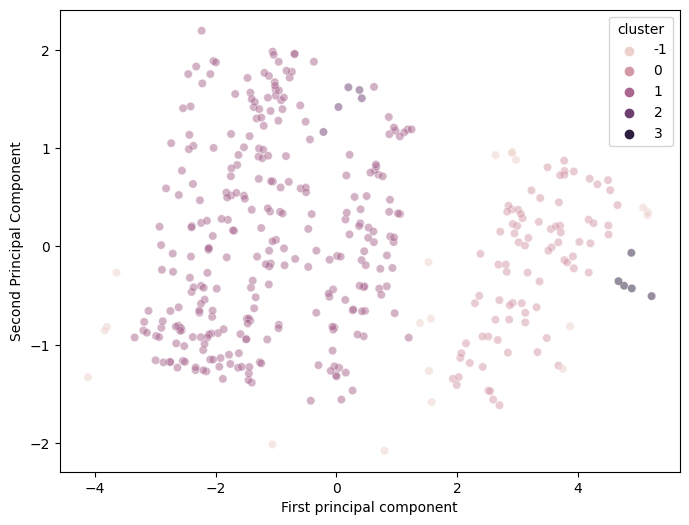

In [44]:
db.build_simple(0.4)

pca.explained_variance_ratio_ = [0.99753652 0.00206325]
np.sum(pca.explained_variance_ratio_ = 0.9995997666059159


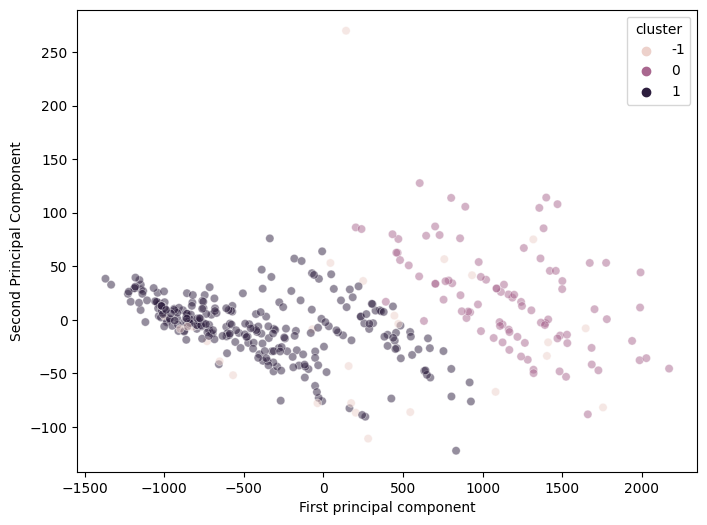

In [45]:
db.simple_check('knife')

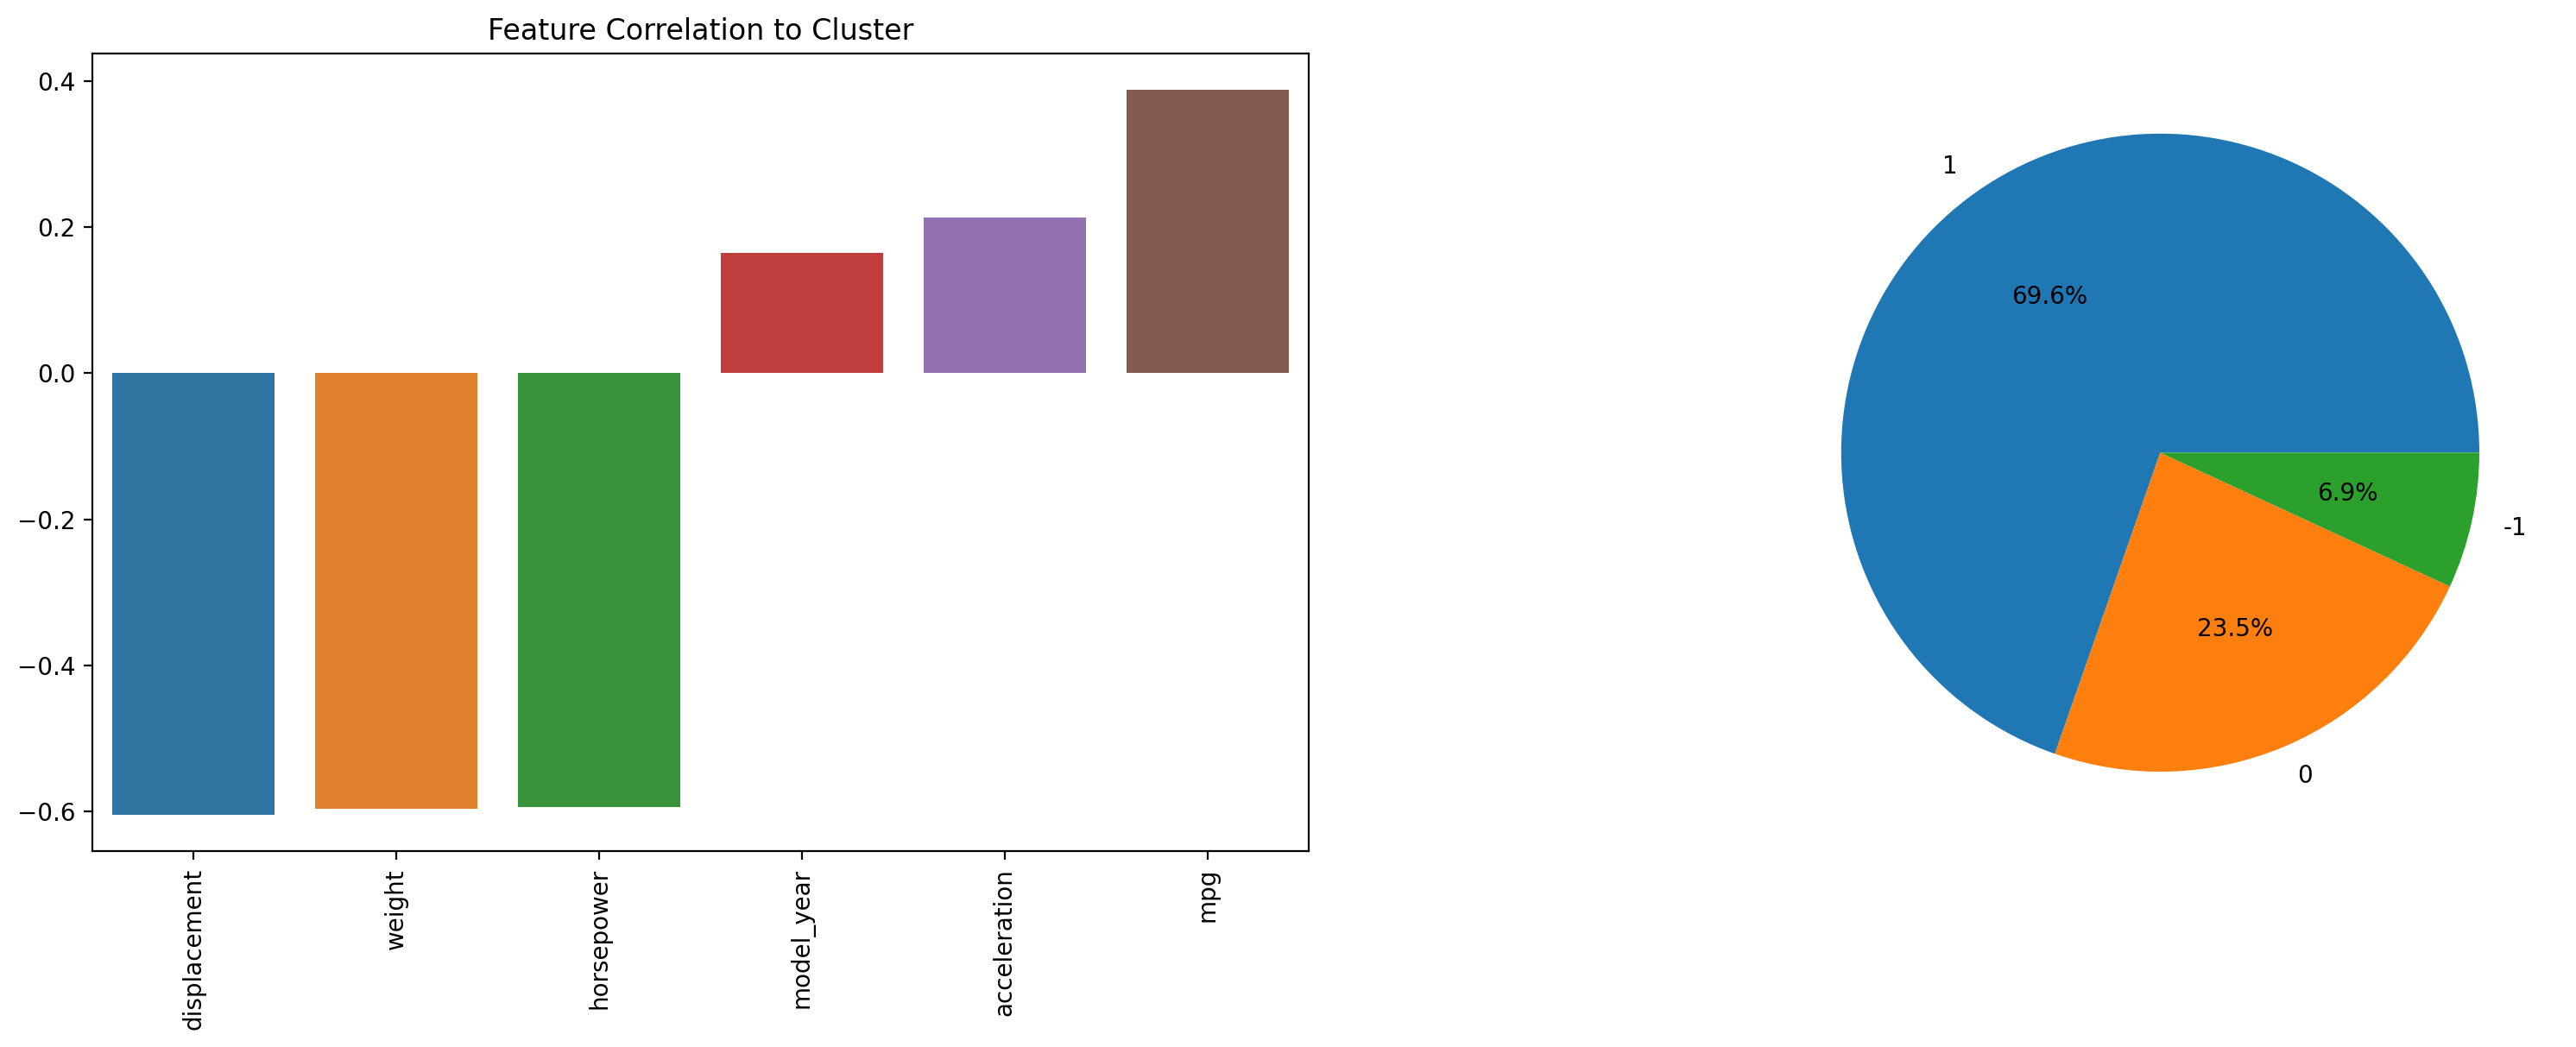

In [46]:
db.pie('knife')

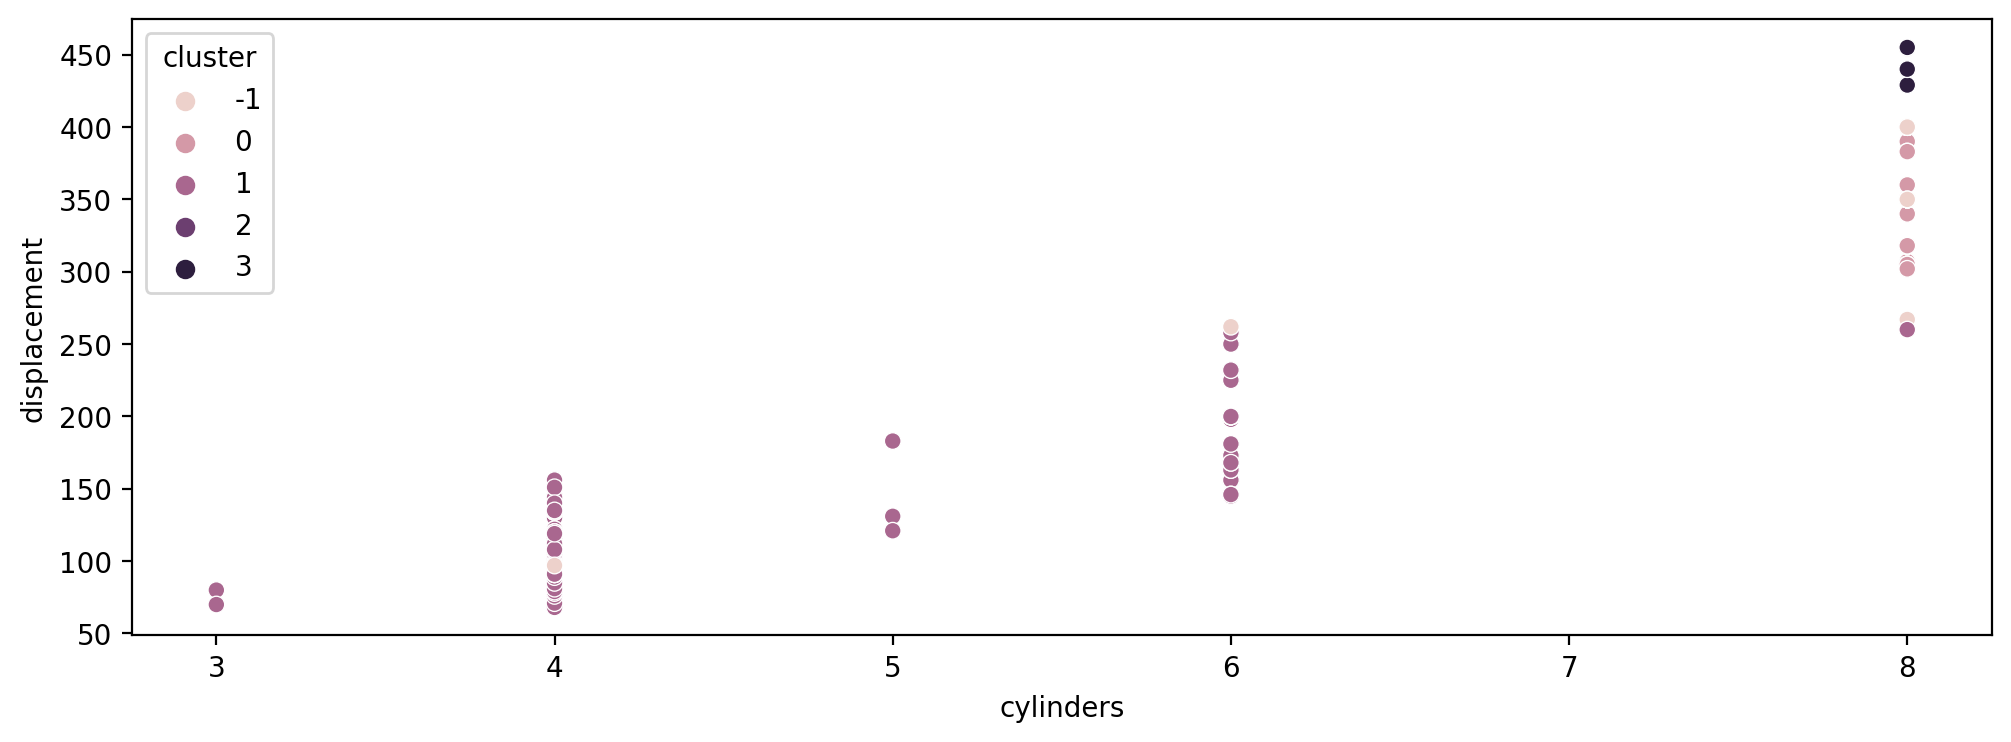

In [47]:
db.feature_corr('simple')